In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

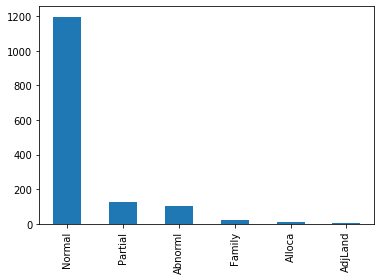

In [8]:
train_df.SaleCondition.value_counts().plot(kind='bar')

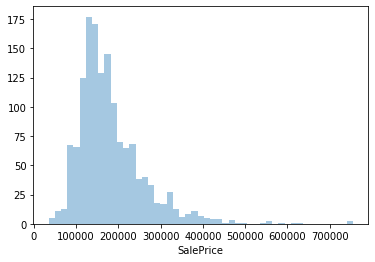

In [9]:
sns.distplot(train_df.SalePrice,kde=False)

Target variable is left skewed

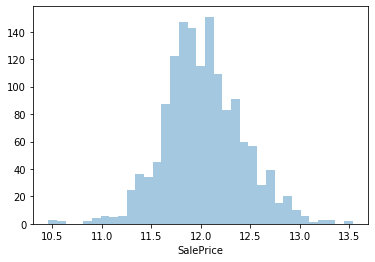

In [10]:
train_df.SalePrice = np.log(train_df.SalePrice)
sns.distplot(train_df.SalePrice,kde=False)

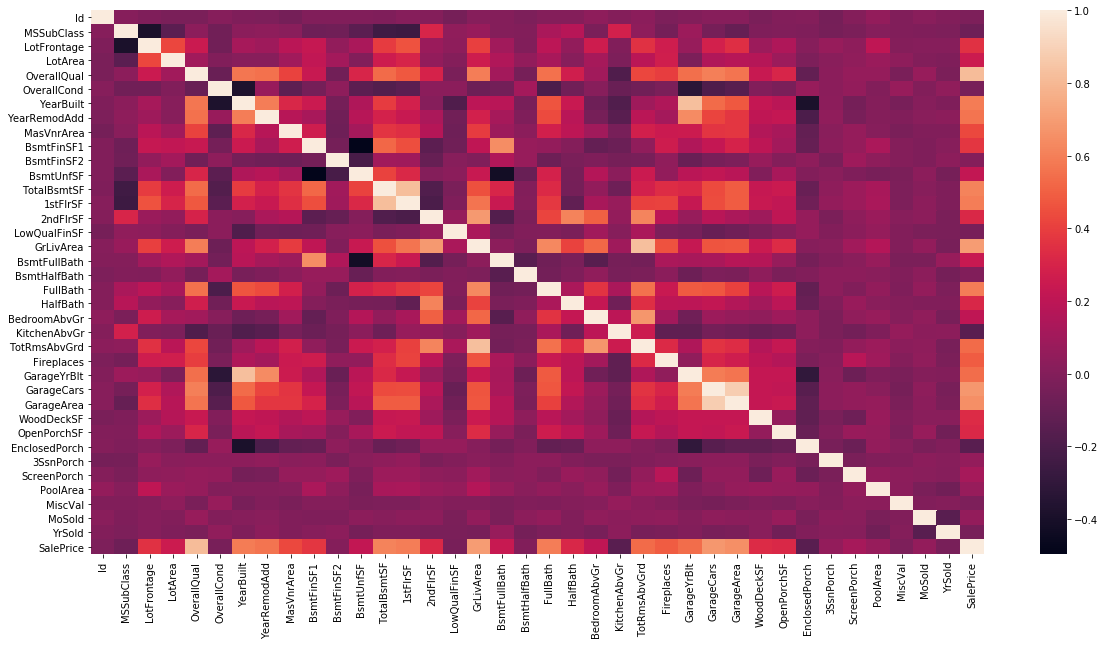

In [11]:
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(train_df.corr())

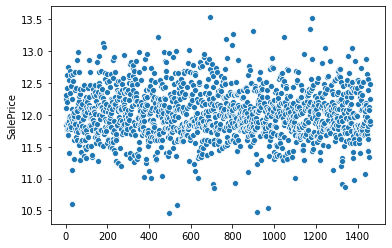

In [12]:
sns.scatterplot(x=[i+1 for i in range(train_df.shape[0])],y=train_df.SalePrice)

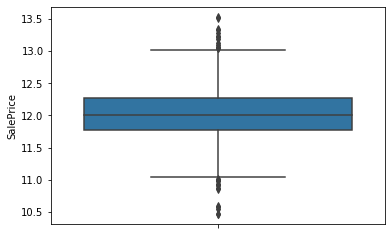

In [13]:
sns.boxplot(y=train_df.SalePrice)

In [14]:
q75, q25 = np.percentile(train_df.loc[:,'SalePrice'], [75 ,25])
iqr = q75 - q25
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)
print(minimum,maximum)

11.027146428351426 13.021682213395525


In [15]:
train_df = train_df[train_df['SalePrice']>minimum]
train_df = train_df[train_df['SalePrice']<maximum]

In [16]:
train_df.shape

(1432, 81)

In [17]:
[train_df.corr().drop_duplicates()['SalePrice']>0.6] or [train_df.corr().drop_duplicates()['SalePrice']<0.6]

[Id               False
 MSSubClass       False
 LotFrontage      False
 LotArea          False
 OverallQual       True
 OverallCond      False
 YearBuilt        False
 YearRemodAdd     False
 MasVnrArea       False
 BsmtFinSF1       False
 BsmtFinSF2       False
 BsmtUnfSF        False
 TotalBsmtSF      False
 1stFlrSF         False
 2ndFlrSF         False
 LowQualFinSF     False
 GrLivArea         True
 BsmtFullBath     False
 BsmtHalfBath     False
 FullBath         False
 HalfBath         False
 BedroomAbvGr     False
 KitchenAbvGr     False
 TotRmsAbvGrd     False
 Fireplaces       False
 GarageYrBlt      False
 GarageCars        True
 GarageArea        True
 WoodDeckSF       False
 OpenPorchSF      False
 EnclosedPorch    False
 3SsnPorch        False
 ScreenPorch      False
 PoolArea         False
 MiscVal          False
 MoSold           False
 YrSold           False
 SalePrice         True
 Name: SalePrice, dtype: bool]

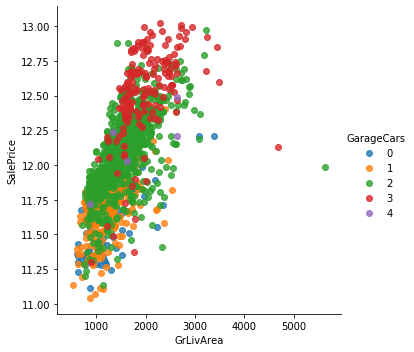

In [18]:
sns.lmplot('GrLivArea','SalePrice',hue='GarageCars',fit_reg=False,data=train_df)

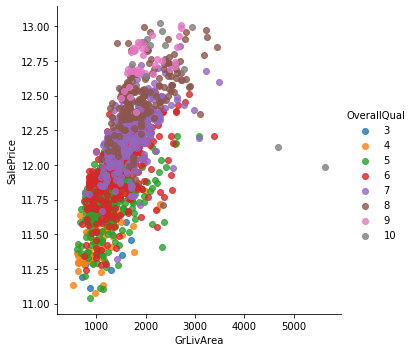

In [19]:
sns.lmplot('GrLivArea','SalePrice',hue='OverallQual',fit_reg=False,data=train_df)

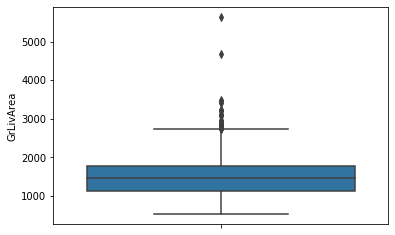

In [20]:
sns.boxplot(y=train_df.GrLivArea)

In [21]:
q75, q25 = np.percentile(train_df.loc[:,'GrLivArea'], [75 ,25])
iqr = q75 - q25
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)
print(minimum,maximum)

179.25 2727.25


In [22]:
train_df = train_df[train_df['GrLivArea']>minimum]
train_df = train_df[train_df['GrLivArea']<maximum]

In [23]:
train_df.shape

(1407, 81)

In [24]:
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

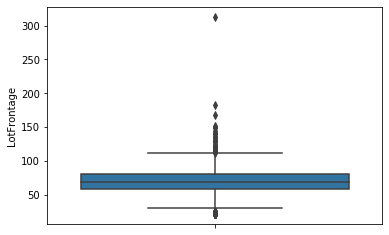

In [25]:
sns.boxplot(y=train_df.LotFrontage)

Lot frontage has some large outliers

In [26]:
train_df = train_df[train_df['LotFrontage']<250]

In [27]:
df = pd.concat([train_df,test_df]).reset_index(drop=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2613 non-null   int64  
 1   MSZoning       2609 non-null   object 
 2   LotFrontage    2386 non-null   float64
 3   LotArea        2613 non-null   int64  
 4   Street         2613 non-null   object 
 5   Alley          188 non-null    object 
 6   LotShape       2613 non-null   object 
 7   LandContour    2613 non-null   object 
 8   Utilities      2611 non-null   object 
 9   LotConfig      2613 non-null   object 
 10  LandSlope      2613 non-null   object 
 11  Neighborhood   2613 non-null   object 
 12  Condition1     2613 non-null   object 
 13  Condition2     2613 non-null   object 
 14  BldgType       2613 non-null   object 
 15  HouseStyle     2613 non-null   object 
 16  OverallQual    2613 non-null   int64  
 17  OverallCond    2613 non-null   int64  
 18  YearBuil

In [29]:
c = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','Utilities','KitchenQual','Functional']
for i in c:
    df[i].fillna(0,inplace=True)

In [30]:
c = ['LotFrontage']
for i in c:
    df[i].fillna(df[i].median(),inplace=True)

In [31]:
c = ['SaleType','MSZoning','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Fence']
d = ['Exterior1st','Exterior2nd','SaleType','MSZoning','RoofMatl','Electrical']
for i in c:
    if i not in d:
        df[i].fillna('Absent',inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

GarageYrBlt is highly correlated with YearBuilt

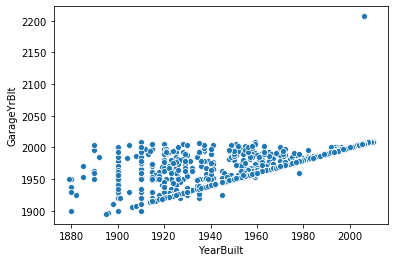

In [32]:
sns.scatterplot(df['YearBuilt'],df['GarageYrBlt'])

In [33]:
c = ['Alley','PoolQC','MiscFeature','SalePrice','GarageYrBlt']
for i in c:
    df.drop(i,axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2613 non-null   int64  
 1   MSZoning       2613 non-null   object 
 2   LotFrontage    2613 non-null   float64
 3   LotArea        2613 non-null   int64  
 4   Street         2613 non-null   object 
 5   LotShape       2613 non-null   object 
 6   LandContour    2613 non-null   object 
 7   Utilities      2613 non-null   object 
 8   LotConfig      2613 non-null   object 
 9   LandSlope      2613 non-null   object 
 10  Neighborhood   2613 non-null   object 
 11  Condition1     2613 non-null   object 
 12  Condition2     2613 non-null   object 
 13  BldgType       2613 non-null   object 
 14  HouseStyle     2613 non-null   object 
 15  OverallQual    2613 non-null   int64  
 16  OverallCond    2613 non-null   int64  
 17  YearBuilt      2613 non-null   int64  
 18  YearRemo

In [35]:
df_object = df.select_dtypes(include = ["object"]).columns
df_notobject = df.select_dtypes(exclude = ["object"]).columns
df_notobject = df[df_notobject]
df_object = df[df_object]
df_object = pd.get_dummies(df_object,drop_first=True)
df = pd.concat([df_object, df_notobject], axis = 1)

In [36]:
X = df[:train_df.shape[0]]
Y = df[train_df.shape[0]:]
Y = Y.reset_index(drop=True)

In [37]:
X.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,1,0,1,0,0,1,0,0,...,548.0,0,61,0,0,0,0,0,2,2008
1,0,0,1,0,1,0,0,1,0,0,...,460.0,298,0,0,0,0,0,0,5,2007
2,0,0,1,0,1,0,0,0,0,0,...,608.0,0,42,0,0,0,0,0,9,2008
3,0,0,1,0,1,0,0,0,0,0,...,642.0,0,35,272,0,0,0,0,2,2006
4,0,0,1,0,1,0,0,0,0,0,...,836.0,192,84,0,0,0,0,0,12,2008


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,train_df['SalePrice'],test_size = 0.2, random_state = 42)

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [40]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_pred)
print(r2)

0.8834161601658346


Text(0.5, 1.0, 'Residual plot')

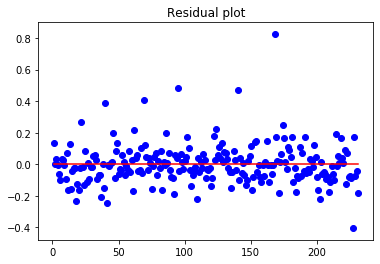

In [41]:
x=[i for i in range(1,len(y_pred)+1)]
x_plot = plt.scatter(x, (y_pred - y_test), c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title('Residual plot')

In [42]:
from sklearn.linear_model import Lasso,Ridge

ridgeReg = Ridge(alpha=10)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2=r2_score(y_test, pred)
print('RMSE= ', rmse, 'R2 = ', r2)

RMSE=  0.1120681000267123 R2 =  0.9089658681854624


Text(0.5, 1.0, 'Residual plot')

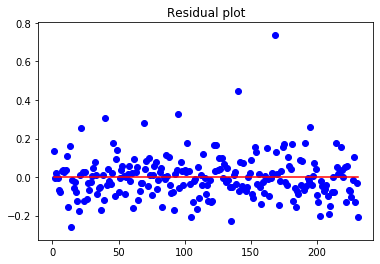

In [43]:
x=[i for i in range(1,len(y_pred)+1)]
x_plot = plt.scatter(x, (pred - y_test), c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title('Residual plot')

In [44]:
lassoReg = Lasso(alpha=1)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2=r2_score(y_test, pred)
print('RMSE= ', rmse, 'R2 = ', r2)

RMSE=  0.1418933679188439 R2 =  0.8540633305273915


Text(0.5, 1.0, 'Residual plot')

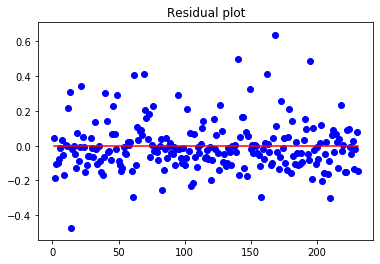

In [45]:
x=[i for i in range(1,len(y_pred)+1)]
x_plot = plt.scatter(x, (pred - y_test), c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title('Residual plot')

In [46]:
test_pred = lassoReg.predict(Y)

In [47]:
test_pred = np.exp(test_pred)

In [48]:
ls = []
for i in range(len(test_df)):
    ls.append([i+test_df.shape[0],test_pred[i]])

In [49]:
ls = pd.DataFrame(ls)
ls.to_csv('submission.csv')